# New explicit spike solution – non-local component of the generalized Mixmaster attractor by Lim
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 19, 2022

https://arxiv.org/pdf/0710.0628.pdf

In [62]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [63]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [64]:
tau,x,y,z,dtau,dx,dy,dz = symbols('tau x y z dtau dx dy dz')

In [65]:
P = Function('P')(tau,x)
P

In [66]:
Q = Function('Q')(tau,x)
Q

In [67]:
Lambda = Function('lambda')(tau,x)
Lambda

In [68]:
variables = Matrix([tau,x,y,z])
variables

⎡τ⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [69]:
differentials = Matrix([dtau,dx,dy,dz])
differentials 

⎡dtau⎤
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎢ dy ⎥
⎢    ⎥
⎣ dz ⎦

In [70]:
lineElement = expand( - exp((Lambda-3*tau)/2)*dtau**2 + exp((Lambda + tau)/2)*dx**2 + exp(P-tau)* ((dy + Q*dz)**2 )+ exp(-P-tau) * dz**2 ) 
lineElement

In [71]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   λ(τ, x)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(τ, x)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(τ, x)                      

In [72]:
import sympy

In [73]:
m = sympy.Array(g)
m

⎡  -3⋅τ   λ(τ, x)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(τ, x)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(τ, x)                      

In [74]:
from einsteinpy.symbolic import *

In [75]:
syms = sympy.symbols("tau x y z")
tau,x,y,z = syms

In [76]:
metric = MetricTensor(m,syms)

In [77]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                     ∂                                                                   
⎢⎢──(λ(τ, x))           ──(λ(τ, x))                                                         
⎢⎢∂τ            3       ∂x                                                                  
⎢⎢─────────── - ─       ───────────                                         0               
⎢⎢     4        4            4                                                              
⎢⎢                                                                                          
⎢⎢  ∂              ⎛∂              ⎞  2⋅τ                                                   
⎢⎢  ──(λ(τ, x))    ⎜──(λ(τ, x)) + 1⎟⋅ℯ                                                      
⎢⎢  ∂x             ⎝∂τ             ⎠                                                        
⎢⎢  ───────────    ──────────────────────                                   0               
⎢⎢       4                   4                                        

In [78]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, x) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, x))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, x))⎟    ⎜──(P(τ, x))⎟    ──(λ(τ, x))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂x       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, x) ∂           ∂             ∂           ∂        

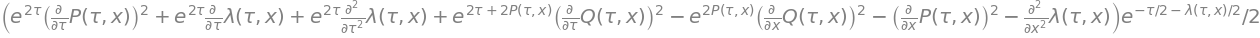

In [79]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [80]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                  2                             2                                    
⎢     ⎜ 2⋅τ ⎛∂          ⎞     2⋅τ ∂              2⋅τ  ∂              2⋅τ + 2⋅P(τ, x) ⎛∂     
⎢0.25⋅⎜ℯ   ⋅⎜──(P(τ, x))⎟  + ℯ   ⋅──(λ(τ, x)) + ℯ   ⋅───(λ(τ, x)) + ℯ               ⋅⎜──(Q(τ
⎢     ⎜     ⎝∂τ         ⎠         ∂τ                   2                             ⎝∂τ    
⎢     ⎝                                              ∂τ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [81]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [82]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [83]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(τ, x) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(τ, x))   ℯ    ⋅───(λ(τ, 
⎢  ℯ         ⋅⎜──(Q(τ, x))⎟    ⎜──(P(τ, x))⎟    ──(λ(τ, x))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂x       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(τ, x) ∂           ∂             ∂           ∂        

In [84]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                 2                           2                2            
⎢   -2⋅τ + 2⋅P(τ, x) ⎛∂          ⎞     2⋅P(τ, x) ⎛∂          ⎞    ⎛∂          ⎞    ∂        
⎢  ℯ                ⋅⎜──(Q(τ, x))⎟    ℯ         ⋅⎜──(Q(τ, x))⎟    ⎜──(P(τ, x))⎟    ──(λ(τ, x
⎢                    ⎝∂x         ⎠               ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ       
⎢- ──────────────────────────────── - ───────────────────────── - ────────────── - ─────────
⎢                 4                               4                     4               4   
⎢                                                                                           
⎢                       2⋅P(τ, x) ∂           ∂             ∂           ∂             ∂     
⎢                      ℯ         ⋅──(Q(τ, x))⋅──(Q(τ, x))   ──(P(τ, x))⋅──(P(τ, x))   ──(λ(τ
⎢                                 ∂τ          ∂x            ∂τ          ∂x            ∂x    
⎢                    - ────────────────────────────────── - ──────────

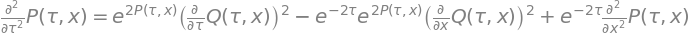

In [109]:
equation2 = Eq(diff(P,tau,tau), expand(solve(ricciSimplified[2,2].args[1], diff(P,tau,tau) )[0]))
equation2

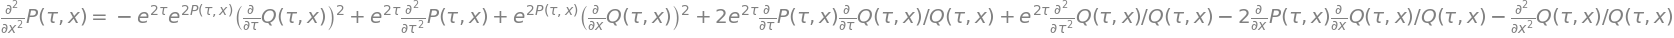

In [102]:
d2pdx2 = Eq(diff(P,x,x), expand( solve(ricciSimplified[2,3].args[1],diff(P,x,x) )[0]) ) 
d2pdx2

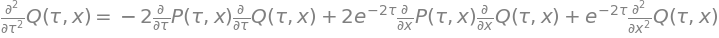

In [110]:
equation3 = Eq(diff(Q,tau,tau), expand(solve(ricciSimplified[3,3].args[1].subs(d2pdx2.lhs,d2pdx2.rhs),diff(Q,tau,tau))[0] ) )
equation3

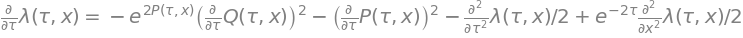

In [107]:
equation4 = Eq(diff(Lambda,tau),solve( ricciSimplified[0,0], diff(Lambda,tau) )[0] ) 
equation4

In [108]:
equation5 = Eq(diff(Lambda,x),solve( ricciSimplified[1,0], diff(Lambda,x))[0] ) 
equation5

In [112]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4,equation5])
vacuumFieldEquations

⎡   2                                    2                                 2           2    
⎢  ∂              2⋅P(τ, x) ⎛∂          ⎞     -2⋅τ  2⋅P(τ, x) ⎛∂          ⎞     -2⋅τ  ∂     
⎢ ───(P(τ, x)) = ℯ         ⋅⎜──(Q(τ, x))⎟  - ℯ    ⋅ℯ         ⋅⎜──(Q(τ, x))⎟  + ℯ    ⋅───(P(τ
⎢   2                       ⎝∂τ         ⎠                     ⎝∂x         ⎠            2    
⎢ ∂τ                                                                                 ∂x     
⎢                                                                                           
⎢  2                                                                                    2   
⎢ ∂                 ∂           ∂                -2⋅τ ∂           ∂              -2⋅τ  ∂    
⎢───(Q(τ, x)) = - 2⋅──(P(τ, x))⋅──(Q(τ, x)) + 2⋅ℯ    ⋅──(P(τ, x))⋅──(Q(τ, x)) + ℯ    ⋅───(Q(
⎢  2                ∂τ          ∂τ                    ∂x          ∂x                    2   
⎢∂τ                                                                   